# Instability of multistep method

Conside the ODE
$$
y' = -y
$$
with initial condition
$$
y(0) = 1
$$
The exact solution is
$$
y(t) = \exp(-t)
$$
Let us use a 2-step, second order method
$$
y_{n+2} - 2.01 y_{n+1} + 1.01 y_n = h[0.995 f_{n+1} - 1.005 f_n]
$$
We will use the initial conditions
$$
y_0 =1, \qquad y_1 = \exp(-h)
$$
Then solving for $y_{n+2}$
$$
y_{n+2} =  2.01 y_{n+1} - 1.01 y_n + h[0.995 f_{n+1} - 1.005 f_n]
$$

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

Exact solution

In [6]:
def yexact(t):
    return np.exp(-t)

The next function implements the 2-step method.

In [7]:
def f(t,y):
    return -y

def solve(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    t[0], y[0] = t0, y0
    t[1], y[1] = t0+h, np.exp(-(t0+h))
    for n in range(2,N):
        t[n] = t[n-1] + h
        y[n] = 2.01*y[n-1] - 1.01*y[n-2] \
               + h*(0.995*f(t[n-1],y[n-1]) - 1.005*f(t[n-2],y[n-2]))
    return t, y

## Solve for decreasing h

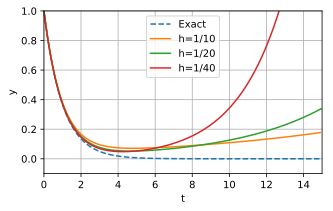

In [18]:
T  = 15.0
t0, y0 = 0.0, 1.0
H  = [1.0/10.0,1.0/20.0,1.0/40]

te = np.linspace(t0,T,100)
ye = yexact(te)
plt.figure(figsize=(5,3))
plt.plot(te,ye,'--')

for h in H:
    t,y = solve(t0,T,y0,h)
    plt.plot(t,y)
plt.legend(('Exact','h=1/10','h=1/20','h=1/40'))
plt.xlabel('t')
plt.ylabel('y')
plt.axis([0,15,-0.1,1])
plt.grid(True);

The solution becomes worse with decreasing values of $h$. The scheme has the polynomials
$$
\rho(w) = w^2 - 2.01 w + 1.01, \qquad \sigma = 0.995 w - 1.005
$$
The roots of $\rho$ are $1$ and $1.01$. For the homogeneous problem, the 2-step scheme has the solution
$$
y_n = A + B (1.01)^n
$$
The second root is responsible for existence of growing solutions in the above scheme. As we reduce $h$ we take more steps to reach the final time, which leads to larger growth of the spurious solution.